In [1]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
# loading the dataset

crop_data=pd.read_csv("crop_production.csv")
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [3]:
state = ['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
# for i in state:
  # print(i," ",crop_data[crop_data.State_Name==i].District_Name.unique())
print(crop_data.Crop.unique())


['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy'
 'Pineapple' 'Barley' 'Khesari' 'Guar seed' 'Moth'


In [4]:
crop_data = crop_data.dropna()

# Displaying State Names present in the dataset
# print(crop_data[crop_data.State_Name=='Arunachal Pradesh'].District_Name.unique())

# Adding a new column Yield which indicates Production per unit Area. 

crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])
crop_data.head(10)

# Dropping unnecessary columns

data = crop_data.drop(['State_Name'], axis = 1)

dummy = pd.get_dummies(data)
dummy
# print(crop_data.District_Name.unique())
# print(crop_data.Season.unique())
print(crop_data.Crop.unique())
"""<b><i> Splitting dataset into train and test dataset </i></b>"""

from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","Yield","Crop_Year"], axis=1)
y = dummy["Production"]
# print(x["Season_Kharif     "])
# Splitting data set - 25% test dataset and 75% 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)


from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)
rf_predict = model.predict(x_test)





C:\Users\Sagar S M\AppData\Local\Temp\ipykernel_8356\310862376.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])


['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Mesta' 'Cowpea(Lobia)' 'Lemon' 'Pome Granet'
 'Sapota' 'Cabbage' 'Rapeseed &Mustard' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total'
 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple' 'Barley'
 'Sannhamp' 'Khesari' 'Guar seed' 'Moth' 

KeyboardInterrupt: 

In [6]:
filename = 'random_forest_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
df = pd.DataFrame(x.columns)
df.to_csv("Column.csv")

In [ ]:
x.shape

(242361, 777)

In [ ]:
crop_data.shape

#rows X columns

(246091, 7)

In [ ]:
# dataset columns
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [ ]:
# statistical inference of the dataset

crop_data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [ ]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [ ]:
# Dropping missing values 
crop_data = crop_data.dropna()
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [ ]:
#checking
crop_data.isnull().values.any()


False

In [ ]:
# Displaying State Names present in the dataset
crop_data[crop_data.State_Name=='Andaman and Nicobar Islands'].District_Name.unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS'],
      dtype=object)

In [ ]:
# Adding a new column Yield which indicates Production per unit Area. 

crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])
crop_data.head(10) 

<ipython-input-10-21ef19bb9e83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,3583.223250
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0,2.777778
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,2.000000
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0,3.000000
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0,4.225000


In [ ]:
# Dropping unnecessary columns

data = crop_data.drop(['State_Name'], axis = 1)

In [ ]:
data.corr()

,Crop_Year,Area,Production,Yield
Crop_Year,1.000000,-0.025305,0.006989,0.013499
Area,-0.025305,1.000000,0.040587,0.001822
Production,0.006989,0.040587,1.000000,0.330961
Yield,0.013499,0.001822,0.330961,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

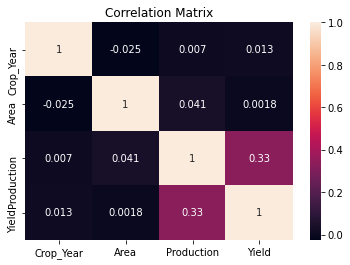

In [ ]:
sns.heatmap(data.corr(), annot =True)
plt.title('Correlation Matrix')

In [ ]:
dummy = pd.get_dummies(data)
dummy


,Crop_Year,Area,Production,Yield,District_Name_24 PARAGANAS NORTH,District_Name_24 PARAGANAS SOUTH,District_Name_ADILABAD,District_Name_AGAR MALWA,District_Name_AGRA,District_Name_AHMADABAD,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,2000,1254.0,2000.0,1.594896,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,2.0,1.0,0.500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000,102.0,321.0,3.147059,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,176.0,641.0,3.642045,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,720.0,165.0,0.229167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,2014,306.0,801.0,2.617647,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246087,2014,627.0,463.0,0.738437,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246088,2014,324.0,16250.0,50.154321,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246089,2014,279151.0,597899.0,2.141848,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b><i> Splitting dataset into train and test dataset </i></b>

In [ ]:

from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","Yield"], axis=1)
y = dummy["Production"]

# Splitting data set - 25% test dataset and 75% 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (181770, 778)
x_test : (60591, 778)
y_train : (181770,)
y_test : (60591,)


In [ ]:
print(x_train)
print(y_train)

        Crop_Year    Area  District_Name_24 PARAGANAS NORTH  \
201072       2013    16.0                                 0   
191897       1998  5400.0                                 0   
43814        2000  2968.0                                 0   
32815        2013   211.0                                 0   
62249        2006  1700.0                                 0   
...           ...     ...                               ...   
236131       2000   207.0                                 0   
127145       2007    39.0                                 0   
20536        2005    43.0                                 0   
18709        2011  2489.0                                 0   
35767        1999    67.0                                 0   

        District_Name_24 PARAGANAS SOUTH  District_Name_ADILABAD  \
201072                                 0                       0   
191897                                 0                       0   
43814                                  

<b><h3> Linear Regression </b></h3>

In [ ]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Predicting the test Results 

lr_predict = model.predict(x_test)
lr_predict

array([  -85149.09375 ,   477482.78125 , -1271634.28125 , ...,
         145619.703125, -1749282.734375,   119897.      ])

In [ ]:
model.score(x_test,y_test)

-66175.59283970056

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  -66175.59283970056


In [ ]:
# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Text(0.5, 1.0, 'Linear Regression')

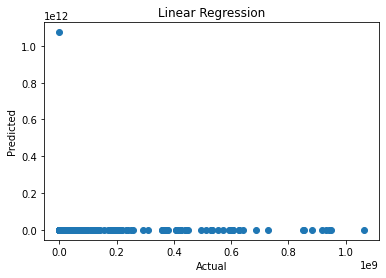

In [ ]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(lr_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('linear Regression')

<b><h3> Random Forest Algorithm </h3></b>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)
rf_predict = model.predict(x_test)
rf_predict

array([ 4087.93636364,   602.36363636,  2216.45454545, ...,
         220.90909091, 12160.63636364,   118.18181818])

In [ ]:
model.score(x_test,y_test)

0.9543893048576644

In [ ]:
# Calculating R2 score

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.9473978231931719


In [ ]:
# Calculating Adj. R2 score: 

Adjr2_2 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

Adj. R-Squared : 0.9579747198113833


Text(0.5, 1.0, 'Random Forest Regression')

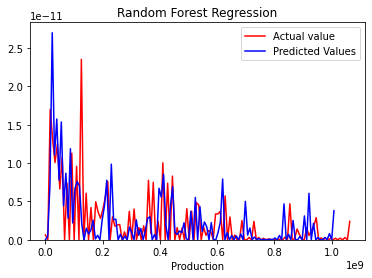

In [ ]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(rf_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')

<b> Decision Tree </b>

In [ ]:
# Training model 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

array([3900.,  705., 2377., ...,   84., 9656.,  100.])

In [ ]:
regressor.score(x_test,y_test)

0.9585143413328677

In [ ]:
# Calculating R2 score :

from sklearn.metrics import r2_score
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

R2 score :  0.9585143413328677


In [ ]:
# Calculating Adj. R2 score: 

Adjr2_3 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_3))

Adj. R-Squared : 0.9579747198113833


In [ ]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(decisiontree_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('decision tree Regression')

Random Forest Regression 

In [ ]:
# CV results are not easy to use, 
# sklearn provides a way to download these results into a dataframe 
df = pd.DataFrame(reg.cv_results_)
df


In [ ]:
df[['param_C','param_kernel','mean_test_score']]

In [ ]:
reg.best_score_

In [ ]:
reg.best_params_

In [ ]:
# To tackle the computation problem in gridsearch , 
# randomizedsearchcv comes in. Randomly tries value.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(regressor(gamma='auto'),{
    'c': [1,10,20],
    'kernel' : ['rbf','linear']
},
 cv = 5,
 return_train_score=False,
 n_iter=2
)
rs.fit(x_train,y_train)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]


TypeError: 'numpy.ndarray' object is not callable

Decision Tree
